Jonathon Nguyen

ID: 801093003

Homework 1


In [1]:
import torch
import imageio
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

<b>Problem One<b>

In [2]:
# Load all the images. 
# When loading the images, the stride was using negative number. So I used np.ascontiguousarray() to fix that.
redBagImage = np.ascontiguousarray(imageio.imread("Images/RedCoughDropBag.jpg"))
blueSlidesImage = np.ascontiguousarray(imageio.imread("Images/BlueSlides.jpg"))
greenBagImage = np.ascontiguousarray(imageio.imread("Images/GreenFoodLionBag.jpg"))
blueBoxImage = np.ascontiguousarray(imageio.imread("Images/BlueMask.jpg"))
greenBookImage = np.ascontiguousarray(imageio.imread("Images/GreenTextbook.jpg"))

# Convert the images to a tensors.
redBagImage = torch.from_numpy(redBagImage)
blueSlidesImage = torch.from_numpy(blueSlidesImage)
greenBagImage = torch.from_numpy(greenBagImage)
blueBoxImage = torch.from_numpy(blueBoxImage)
greenBookImage = torch.from_numpy(greenBookImage)

In [3]:
# Converted the Data type to float in order to take the mean.
redBagImage = redBagImage.float()
blueSlidesImage = blueSlidesImage.float()
greenBagImage = greenBagImage.float()
blueBoxImage = blueBoxImage.float()
greenBookImage = greenBookImage.float()

# Find the mean of the image to find the brightness.
redBagMean = redBagImage.mean()
blueSlidesMean = blueSlidesImage.mean()
greenBagMean = greenBagImage.mean()
blueBoxMean = blueBoxImage.mean()
greenBookMean = greenBookImage.mean()

# Print out the data.
print(f"Red Cough Drop Bag Image Mean: {redBagMean}")
print(f"Blue Slides Image Mean: {blueSlidesMean}")
print(f"Green Food Lion Bag Image Mean: {greenBagMean}")
print(f"Blue Mask Box Image Mean: {blueBoxMean}")
print(f"Green Textbook Image Mean: {greenBookMean}")

Red Cough Drop Bag Image Mean: 128.55856323242188
Blue Slides Image Mean: 120.75611114501953
Green Food Lion Bag Image Mean: 107.555908203125
Blue Mask Box Image Mean: 116.16453552246094
Green Textbook Image Mean: 117.69412994384766


In [4]:
# Find the mean for each color channel.
print("Red Cough Drop Bag Image\n")
print(f"Red Channel Tensor Average: {redBagImage[:, :, 0].mean()}")
print(f"Green Channel Tensor Average: {redBagImage[:, :, 1].mean()}")
print(f"Blue Channel Tensor Average: {redBagImage[:, :, 2].mean()}")

Red Cough Drop Bag Image

Red Channel Tensor Average: 175.66952514648438
Green Channel Tensor Average: 116.61083984375
Blue Channel Tensor Average: 93.39703369140625


In [5]:
# Find the mean for each color channel.
print("Blue Slides Image\n")
print(f"Red Channel Tensor Average: {blueSlidesImage[:, :, 0].mean()}")
print(f"Green Channel Tensor Average: {blueSlidesImage[:, :, 1].mean()}")
print(f"Blue Channel Tensor Average: {blueSlidesImage[:, :, 2].mean()}")

Blue Slides Image

Red Channel Tensor Average: 116.03202056884766
Green Channel Tensor Average: 117.91149139404297
Blue Channel Tensor Average: 128.32553100585938


In [6]:
# Find the mean for each color channel.
print("Green Food Lion Bag\n")
print(f"Red Channel Tensor Average: {greenBagImage[:, :, 0].mean()}")
print(f"Green Channel Tensor Average: {greenBagImage[:, :, 1].mean()}")
print(f"Blue Channel Tensor Average: {greenBagImage[:, :, 2].mean()}")

Green Food Lion Bag

Red Channel Tensor Average: 108.63582611083984
Green Channel Tensor Average: 120.59931182861328
Blue Channel Tensor Average: 93.41094207763672


In [7]:
# Find the mean for each color channel.
print("Blue Mask Box Image\n")
print(f"Red Channel Tensor Average: {blueBoxImage[:, :, 0].mean()}")
print(f"Green Channel Tensor Average: {blueBoxImage[:, :, 1].mean()}")
print(f"Blue Channel Tensor Average: {blueBoxImage[:, :, 2].mean()}")

Blue Mask Box Image

Red Channel Tensor Average: 97.59046173095703
Green Channel Tensor Average: 119.61042022705078
Blue Channel Tensor Average: 131.4639434814453


In [8]:
# Find the mean for each color channel.
print("Green Textbook Image\n")
print(f"Red Channel Tensor Average: {greenBookImage[:, :, 0].mean()}")
print(f"Green Channel Tensor Average: {greenBookImage[:, :, 1].mean()}")
print(f"Blue Channel Tensor Average: {greenBookImage[:, :, 2].mean()}")

Green Textbook Image

Red Channel Tensor Average: 121.31265258789062
Green Channel Tensor Average: 137.3888702392578
Blue Channel Tensor Average: 94.36238098144531


<b>Problem Two<b>

In [9]:
# Define the non-linear model
def model(t_u, w2, w1, b):
    return w2* t_u ** 2 + w1 * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [10]:
def training_loop(epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, epochs + 1):
        w2, w1, b = params
        
        if params.grad is not None:
            params.grad.zero_()
        
        # Pass the input vars and parms into the model
        # Find the loss and back progragate.
        t_p = model(t_u, w2, w1, b)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
        
        # Every 500 epoch, it will print the loss.
        if (epoch % 500 == 0):
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
    return params

In [11]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

# Convert the list into tensors.
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

# normalize the input.
t_u_normalize = 0.1 * t_u

# Set it to loop for 5000.
NUM_EPOCHS = 5000

In [12]:
# Call the training loop with a learning rate of .1
LEARNING_RATE = 0.1
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
training_loop(NUM_EPOCHS, LEARNING_RATE, params, t_u_normalize, t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

In [13]:
# Call the training loop with a learning rate of .01
LEARNING_RATE = 0.01
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
training_loop(NUM_EPOCHS, LEARNING_RATE, params, t_u_normalize, t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

In [14]:
# Call the training loop with a learning rate of .001
LEARNING_RATE = 0.001
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
training_loop(NUM_EPOCHS, LEARNING_RATE, params, t_u_normalize, t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

In [15]:
# Call the training loop with a learning rate of .0001
LEARNING_RATE = 0.0001
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
params_new = training_loop(NUM_EPOCHS, LEARNING_RATE, params, t_u_normalize, t_c)
params_new

Epoch 500, Loss 10.708596
Epoch 1000, Loss 8.642084
Epoch 1500, Loss 7.171004
Epoch 2000, Loss 6.123477
Epoch 2500, Loss 5.377228
Epoch 3000, Loss 4.845287
Epoch 3500, Loss 4.465787
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000801
Epoch 5000, Loss 3.861745


tensor([ 0.5570, -0.8881, -0.8753], requires_grad=True)

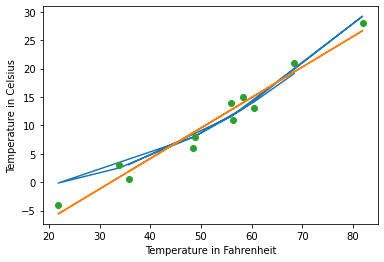

In [16]:
# Defined the linear model so I can plot the predicted linear values.
def linear_model(t_u, w, b):
    return t_u*w + b

# Pass the best params with the normalize model.
t_p = model(t_u_normalize, *params_new)

# I got the params from the lecture slides
linear_params = torch.tensor([5.3671, -17.3012])
t_p_linear = linear_model(t_u_normalize, *linear_params)

fig = plt.figure()
# Name the x and y axis
plt.xlabel("Temperature in Fahrenheit")
plt.ylabel("Temperature in Celsius")

# Plot the model and the actual values.
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_p_linear.numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

<b>Problem Three<b>

In [17]:
# A model using 6 input vars and params.
def model(x5, x4, x3, x2, x1, w5, w4, w3, w2, w1, b):
    return w5*x5 + w4*x4 + w3*x3 + w2*x2 + w1*x1 + b

# Squared difference error loss function.
def loss_fn(prices_p, prices):
    squared_diffs = (prices_p - prices) ** 2
    return squared_diffs.mean()

In [18]:
def training_loop(epochs, learning_rate, params, input_vars, prices):
    for epoch in range(1, epochs + 1):
        
        if params.grad is not None:
            params.grad.zero_()
        
        prices_p = model(*input_vars, *params)
        loss = loss_fn(prices_p, prices)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
        
        if (epoch % 500 == 0):
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
    return params

In [19]:
NUM_EPOCHS = 5000

# Read the data from the provided CSV files
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

# split the data into the input vars and the prices.
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
prices = housing['price']

# Turn input, prices and params into a tensor
input_vars = []
for col in num_vars:
     # Packing the tensor into a list to pass as a param
    tensor = torch.tensor(housing[col]).float()
    mean = torch.mean(tensor)
    std = torch.std(tensor)
    input_vars.append((tensor - mean) / std)

prices = torch.tensor(prices.values).float()

In [20]:
# Call the training loop with a learning rate of .1
LEARNING_RATE = 0.1
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
training_loop(NUM_EPOCHS, LEARNING_RATE, params, input_vars, prices)

Epoch 500, Loss 1531008516096.000000
Epoch 1000, Loss 1531008516096.000000
Epoch 1500, Loss 1531008516096.000000
Epoch 2000, Loss 1531008516096.000000
Epoch 2500, Loss 1531008516096.000000
Epoch 3000, Loss 1531008516096.000000
Epoch 3500, Loss 1531008516096.000000
Epoch 4000, Loss 1531008516096.000000
Epoch 4500, Loss 1531008516096.000000
Epoch 5000, Loss 1531008516096.000000


tensor([ 718567.2500,  123854.4453,  569669.8125,  475333.6250,  325331.6250,
        4766728.5000], requires_grad=True)

In [21]:
# Call the training loop with a learning rate of .01
LEARNING_RATE = 0.01
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
params_new = training_loop(NUM_EPOCHS, LEARNING_RATE, params, input_vars, prices)

Epoch 500, Loss 1531009171456.000000
Epoch 1000, Loss 1531008516096.000000
Epoch 1500, Loss 1531008516096.000000
Epoch 2000, Loss 1531008516096.000000
Epoch 2500, Loss 1531008516096.000000
Epoch 3000, Loss 1531008516096.000000
Epoch 3500, Loss 1531008516096.000000
Epoch 4000, Loss 1531008516096.000000
Epoch 4500, Loss 1531008516096.000000
Epoch 5000, Loss 1531008516096.000000


In [22]:
# Call the training loop with a learning rate of .001
LEARNING_RATE = 0.001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
training_loop(NUM_EPOCHS, LEARNING_RATE, params, input_vars, prices)

Epoch 500, Loss 4694561259520.000000
Epoch 1000, Loss 1959289683968.000000
Epoch 1500, Loss 1590396452864.000000
Epoch 2000, Loss 1539520724992.000000
Epoch 2500, Loss 1532305997824.000000
Epoch 3000, Loss 1531228323840.000000
Epoch 3500, Loss 1531051638784.000000
Epoch 4000, Loss 1531018608640.000000
Epoch 4500, Loss 1531011137536.000000
Epoch 5000, Loss 1531009171456.000000


tensor([ 718280.8125,  124666.1406,  569388.1875,  474805.7188,  325535.3125,
        4766498.5000], requires_grad=True)

In [23]:
# Call the training loop with a learning rate of .0001
LEARNING_RATE = 0.0001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
training_loop(NUM_EPOCHS, LEARNING_RATE, params, input_vars, prices)

Epoch 500, Loss 21512901885952.000000
Epoch 1000, Loss 17731856367616.000000
Epoch 1500, Loss 14688058343424.000000
Epoch 2000, Loss 12231215415296.000000
Epoch 2500, Loss 10243600809984.000000
Epoch 3000, Loss 8632432852992.000000
Epoch 3500, Loss 7324245688320.000000
Epoch 4000, Loss 6260550270976.000000
Epoch 4500, Loss 5394614714368.000000
Epoch 5000, Loss 4688941940736.000000


tensor([ 511149.5938,  236865.7188,  444761.6875,  357367.9062,  315006.6562,
        3013320.5000], requires_grad=True)

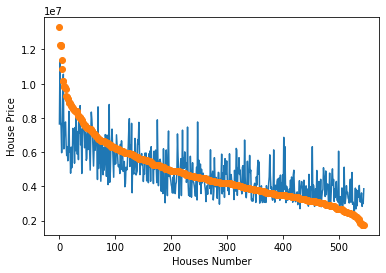

In [24]:
# Find the predicted prices
prices_p = model(*input_vars, *params_new)

fig = plt.figure()
# Name the x and y axis
plt.xlabel("Houses Number")
plt.ylabel("House Price")

# Plot the model and the actual values.
plt.plot(prices_p.detach().numpy())
plt.plot(prices.numpy(), 'o')